In [1]:
#Imports
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
# reupload all data to have as one dataset again
completedf1 = pd.concat([pd.read_csv('0204plays.csv'),pd.read_csv('0507plays.csv'),pd.read_csv('0810plays.csv'),pd.read_csv('1114plays.csv')])

#(remove 2002, because it has served it's purpose of creating 2003 priors)
completedf = completedf1[completedf1['year']>2002].reset_index(drop=True)

/Users/StevenRachesky/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (63,102) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
/Users/StevenRachesky/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
titlesy = []
titlesp = []
xs = []
ys = []
ps = []
for d,df in completedf.groupby('down'):
    titlesy.append('Passing Plays by Yards to First Down on Down ' + str(d))
    titlesp.append('Passing % by Yards to First Down on Down ' + str(d))
    yds = sorted(df.yds_to_go.unique())
    xs.append(yds)
    ys.append([int(df[df.yds_to_go==y]['RESP'].sum()) for y in yds])
    ps.append([df[df.yds_to_go==y]['RESP'].mean()*100.0 for y in yds])

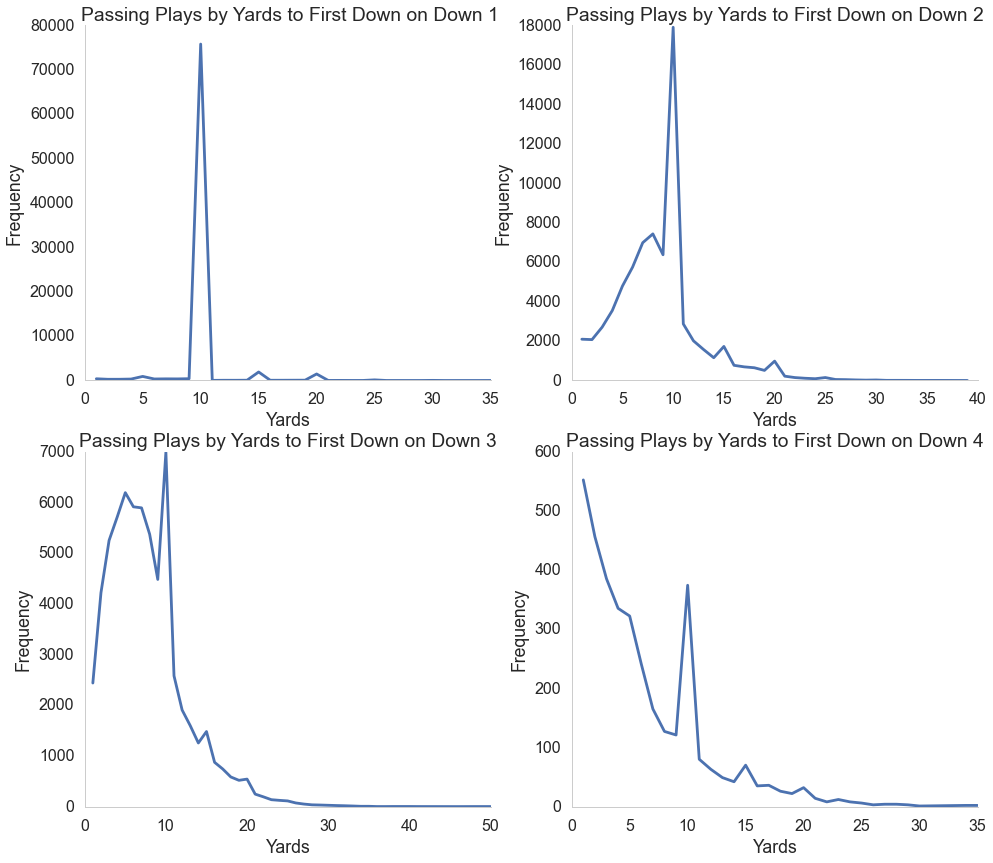

In [5]:
# create subplots for bar charts of passing % and passing plays on each down, by yards to go to first down
f, axarr = plt.subplots(2, 2, figsize=(16,14))
axes = axarr[0].tolist()
axes.extend(axarr[1].tolist())

for i in xrange(4):
    axes[i].plot(xs[i], ys[i])
    axes[i].set_title(titlesy[i])
    axes[i].set_ylabel("Frequency")
    axes[i].set_xlabel("Yards")
    axes[i].grid(False)
    sns.despine()

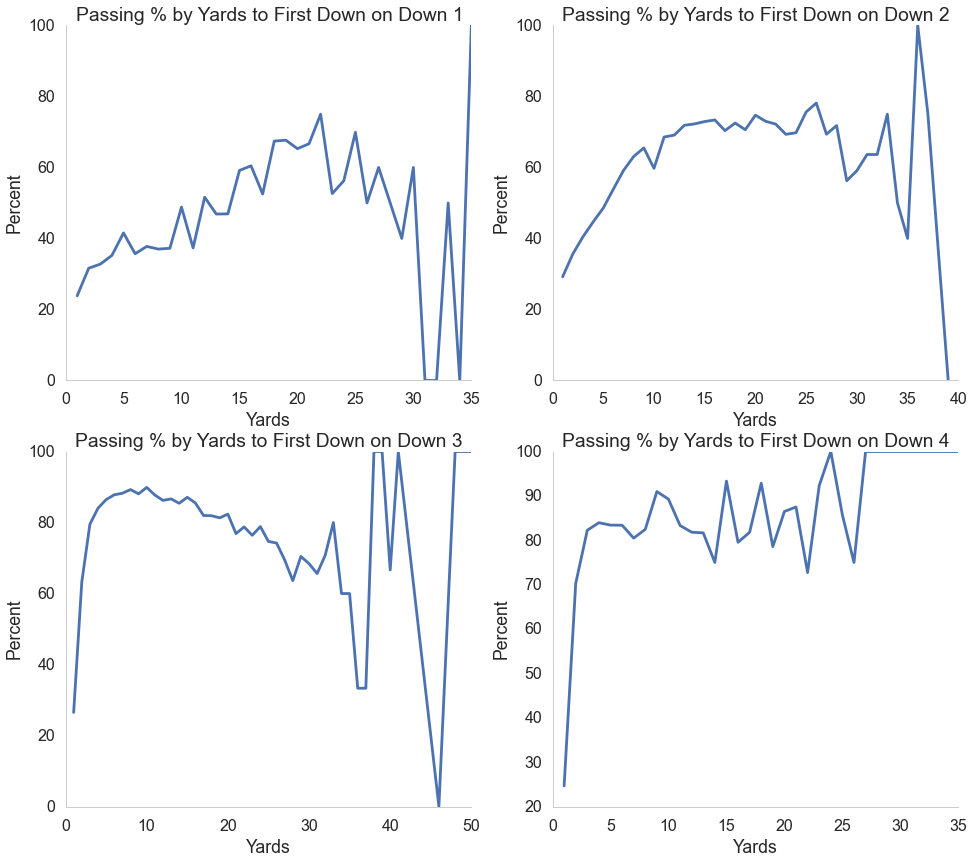

In [8]:
# create subplots for bar charts of passing % and passing plays on each down, by yards to go to first down
f, axarr = plt.subplots(2, 2, figsize=(16,14))
axes = axarr[0].tolist()
axes.extend(axarr[1].tolist())

for i in xrange(4):
    axes[i].plot(xs[i], ps[i])
    axes[i].set_title(titlesp[i])
    axes[i].set_ylabel("Percent")
    axes[i].set_xlabel("Yards")
    axes[i].grid(False)
    sns.despine()